In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
imdb

Shuffling and writing examples to /home/siki/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTS3Q29/imdb_reviews-train.tfrecord


Shuffling and writing examples to /home/siki/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTS3Q29/imdb_reviews-test.tfrecord


Shuffling and writing examples to /home/siki/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTS3Q29/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /home/siki/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


{'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}

In [6]:
X_train, X_test = imdb['train'], imdb['test']

In [79]:
train_sentence = []
train_label = []
test_sentence = []
test_label = []

for s, l in X_train:
    train_sentence.append(str(s.numpy()))
    train_label.append(l.numpy())

for s, l in X_test:
    test_sentence.append(str(s.numpy()))
    test_label.append(l.numpy())

print(len(train_sentence))
print(len(test_sentence))
train_label = np.array(train_label)
test_label = np.array(test_label)

25000
25000


In [71]:
vocab_size = 1000
embedding_dims = 32
oov_tok = '<oov>'
trunc = 'post'
max_len = 90

In [72]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentence)
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train_sentence)
test_seq = tokenizer.texts_to_sequences(test_sentence)

train_pad = pad_sequences(train_seq, maxlen=max_len, truncating=trunc)
test_pad= pad_sequences(test_seq, maxlen=max_len, truncating=trunc)

In [73]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, GlobalAvgPool1D, Conv1D, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

def plot_history(history):
    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    epochs = list(range(len(loss)))

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'g', label='loss')
    plt.plot(epochs, val_loss, 'b', label='val_loss')
    plt.grid()
    plt.legend()

    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.plot(epochs, acc, 'g', label='accuracy')
    plt.plot(epochs, val_acc, 'b', label='val_accuracy')
    plt.legend()

In [38]:
model = Sequential([
    Embedding(vocab_size, embedding_dims, input_length=max_len),
    Flatten(),
    Dense(6, 'relu'),
    Dense(1, 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 2240)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 13446     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 173,453
Trainable params: 173,453
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
782/782 [==============================] - 2s 3ms/step - loss: 0.0644 - accuracy: 0.9827 - val_loss: 0.5528 - val_accuracy: 0.8117
Epoch 2/15
782/782 [==============================] - 2s 3ms/step - loss: 0.0134 - accuracy: 0.9988 - val_loss: 0.6077 - val_accuracy: 0.8203
Epoch 3/15
782/782 [==============================] - 2s 3ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.6778 - val_accuracy: 0.8208
Epoch 4/15
782/782 [==============================] - 2s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.7306 - val_accuracy: 0.8210
Epoch 5/15
782/782 [==============================] - 2s 3ms/step - loss: 6.9786e-04 - accuracy: 1.0000 - val_loss: 0.7776 - val_accuracy: 0.8212
Epoch 6/15
782/782 [==============================] - 2s 3ms/step - loss: 3.8136e-04 - accuracy: 1.0000 - val_loss: 0.8232 - val_accuracy: 0.8206
Epoch 7/15
782/782 [==============================] - 2s 3ms/step - loss: 2.2792e-04 - accuracy: 1.0000 - val_loss: 0.8691 - val_accuracy: 0

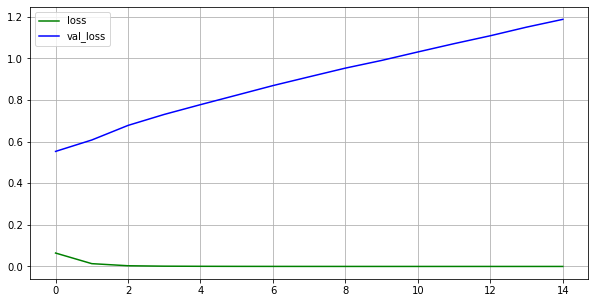

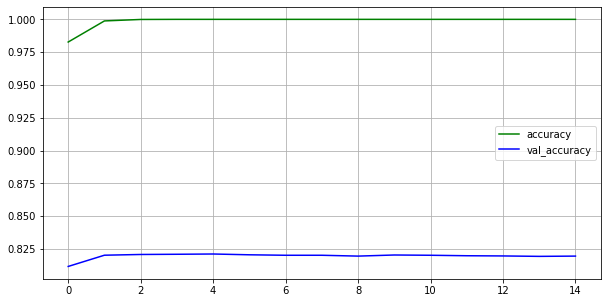

In [40]:
model.fit(train_pad, train_label, epochs=15, validation_data=(test_pad, test_label))
plot_history(model.history.history)

In [74]:
from tensorflow.keras.layers import Conv1D

model = Sequential([
    Embedding(vocab_size, embedding_dims, input_length=max_len),
    Conv1D(50, 8, activation='relu'),
    GlobalAvgPool1D(),
    Dense(5, 'relu'),
    Dense(1, 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 90, 32)            32000     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 83, 50)            12850     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 255       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 45,111
Trainable params: 45,111
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
782/782 [==============================] - 5s 6ms/step - loss: 0.5378 - accuracy: 0.7036 - val_loss: 0.4551 - val_accuracy: 0.7823
Epoch 2/15
782/782 [==============================] - 5s 6ms/step - loss: 0.4420 - accuracy: 0.7918 - val_loss: 0.4471 - val_accuracy: 0.7834
Epoch 3/15
782/782 [==============================] - 5s 6ms/step - loss: 0.4274 - accuracy: 0.8000 - val_loss: 0.4412 - val_accuracy: 0.7858
Epoch 4/15
782/782 [==============================] - 4s 6ms/step - loss: 0.4164 - accuracy: 0.8050 - val_loss: 0.4388 - val_accuracy: 0.7877
Epoch 5/15
782/782 [==============================] - 6s 7ms/step - loss: 0.4072 - accuracy: 0.8098 - val_loss: 0.4479 - val_accuracy: 0.7883
Epoch 6/15
782/782 [==============================] - 5s 7ms/step - loss: 0.4008 - accuracy: 0.8152 - val_loss: 0.4452 - val_accuracy: 0.7875
Epoch 7/15
782/782 [==============================] - 5s 7ms/step - loss: 0.3938 - accuracy: 0.8191 - val_loss: 0.4404 - val_accuracy: 0.7905
Epoch 

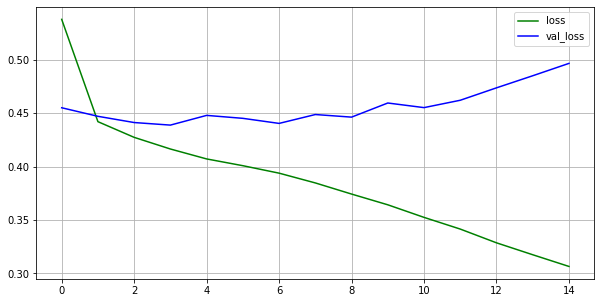

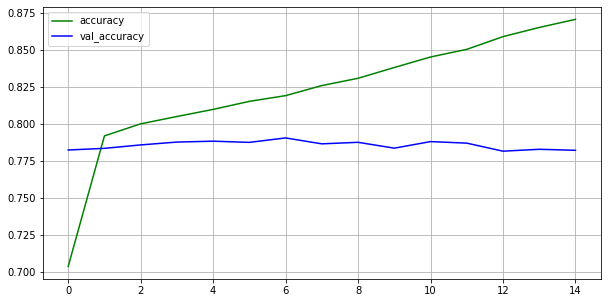

In [75]:
model.fit(train_pad, train_label, epochs=15, validation_data=(test_pad, test_label))
plot_history(model.history.history)

In [76]:
model = Sequential([
    Embedding(vocab_size, embedding_dims, input_length=max_len),
    Bidirectional(LSTM(32)),
    Dense(5, 'relu'),
    Dense(1, 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 90, 32)            32000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 325       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 48,971
Trainable params: 48,971
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
782/782 [==============================] - 32s 41ms/step - loss: 0.5307 - accuracy: 0.7250 - val_loss: 0.4831 - val_accuracy: 0.7700
Epoch 2/15
782/782 [==============================] - 29s 38ms/step - loss: 0.4501 - accuracy: 0.7898 - val_loss: 0.4547 - val_accuracy: 0.7800
Epoch 3/15
782/782 [==============================] - 33s 42ms/step - loss: 0.4307 - accuracy: 0.8012 - val_loss: 0.4677 - val_accuracy: 0.7840
Epoch 4/15
782/782 [==============================] - 29s 37ms/step - loss: 0.4219 - accuracy: 0.8044 - val_loss: 0.4445 - val_accuracy: 0.7888
Epoch 5/15
782/782 [==============================] - 29s 37ms/step - loss: 0.4090 - accuracy: 0.8096 - val_loss: 0.4599 - val_accuracy: 0.7796
Epoch 6/15
782/782 [==============================] - 28s 35ms/step - loss: 0.3977 - accuracy: 0.8165 - val_loss: 0.4640 - val_accuracy: 0.7842
Epoch 7/15
782/782 [==============================] - 28s 36ms/step - loss: 0.3865 - accuracy: 0.8228 - val_loss: 0.4559 - val_accuracy:

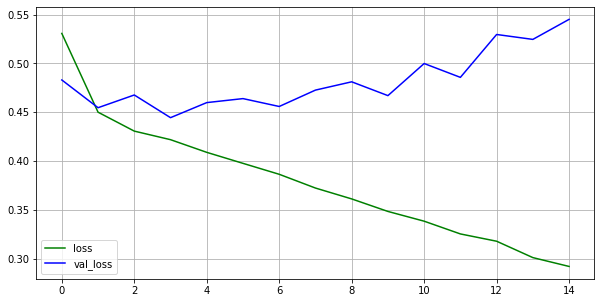

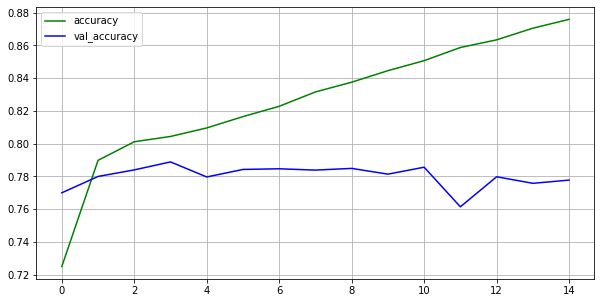

In [77]:
model.fit(train_pad, train_label, epochs=15, validation_data=(test_pad, test_label))
plot_history(model.history.history)

In [47]:
model = Sequential([
    Embedding(vocab_size, embedding_dims, input_length=max_len),
    Bidirectional(GRU(12)),
    Dense(5, 'relu'),
    Dense(1, 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 140, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 24)                2160      
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 125       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 162,291
Trainable params: 162,291
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
782/782 [==============================] - 45s 57ms/step - loss: 0.5181 - accuracy: 0.7164 - val_loss: 0.4185 - val_accuracy: 0.8022
Epoch 2/15
782/782 [==============================] - 37s 48ms/step - loss: 0.3007 - accuracy: 0.8791 - val_loss: 0.3777 - val_accuracy: 0.8358
Epoch 3/15
782/782 [==============================] - 37s 48ms/step - loss: 0.2316 - accuracy: 0.9118 - val_loss: 0.3956 - val_accuracy: 0.8286
Epoch 4/15
782/782 [==============================] - 37s 47ms/step - loss: 0.1766 - accuracy: 0.9368 - val_loss: 0.4478 - val_accuracy: 0.8259
Epoch 5/15
782/782 [==============================] - 38s 48ms/step - loss: 0.1299 - accuracy: 0.9566 - val_loss: 0.5314 - val_accuracy: 0.8212
Epoch 6/15
782/782 [==============================] - 37s 48ms/step - loss: 0.0919 - accuracy: 0.9702 - val_loss: 0.6330 - val_accuracy: 0.8132
Epoch 7/15
782/782 [==============================] - 37s 47ms/step - loss: 0.0617 - accuracy: 0.9806 - val_loss: 0.7170 - val_accuracy:

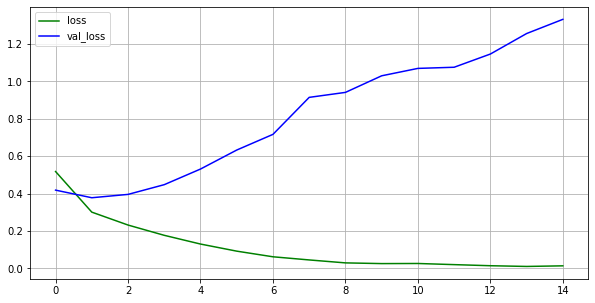

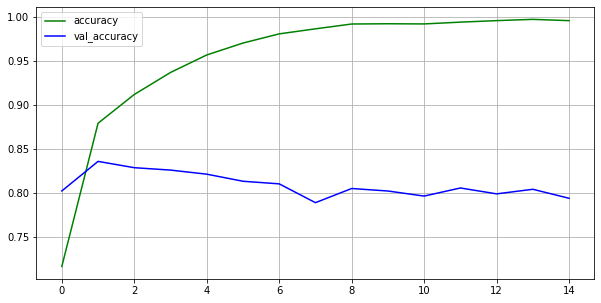

In [48]:
model.fit(train_pad, train_label, epochs=15, validation_data=(test_pad, test_label))
plot_history(model.history.history)

# Embedding vector weights

In [49]:
e = modell.layers[0]
weights = e.get_weights()[0]
index_word = dict([(value, key) for key, value in word_index.items()])

In [64]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='UTF-8')
out_m = io.open('meta.tsv', 'w', encoding='UTF-8')

for word_num in range(1, vocab_size):
    word = index_word[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join(str(x) for x in embeddings) + '\n')
out_v.close()
out_m.close()